<a href="https://colab.research.google.com/github/Atharva-Bhanagay/Atharva-Bhanagay/blob/main/Walmart_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
pip install pmdarima


In [46]:
pip install arch

In [47]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


from arch import arch_model
from arch.univariate import ARX, GARCH, StudentsT, Normal

import warnings
warnings.filterwarnings("ignore")

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
train = pd.read_csv("/content/drive/MyDrive/Walmart_Sales/train.csv")

In [50]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [51]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [52]:
train.shape

(421570, 5)

In [53]:
test = pd.read_csv("/content/drive/MyDrive/Walmart_Sales/test.csv")

In [54]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [55]:
stores = pd.read_csv("/content/drive/MyDrive/Walmart_Sales/stores.csv")

In [56]:
stores.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [57]:
stores.shape

(45, 3)

In [58]:
features = pd.read_csv("/content/drive/MyDrive/Walmart_Sales/features.csv")

In [59]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [60]:
features.shape

(8190, 12)

In [61]:
data = pd.merge(train,stores,how='left',on='Store')


In [62]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [63]:
data = pd.merge(data,features)

In [64]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


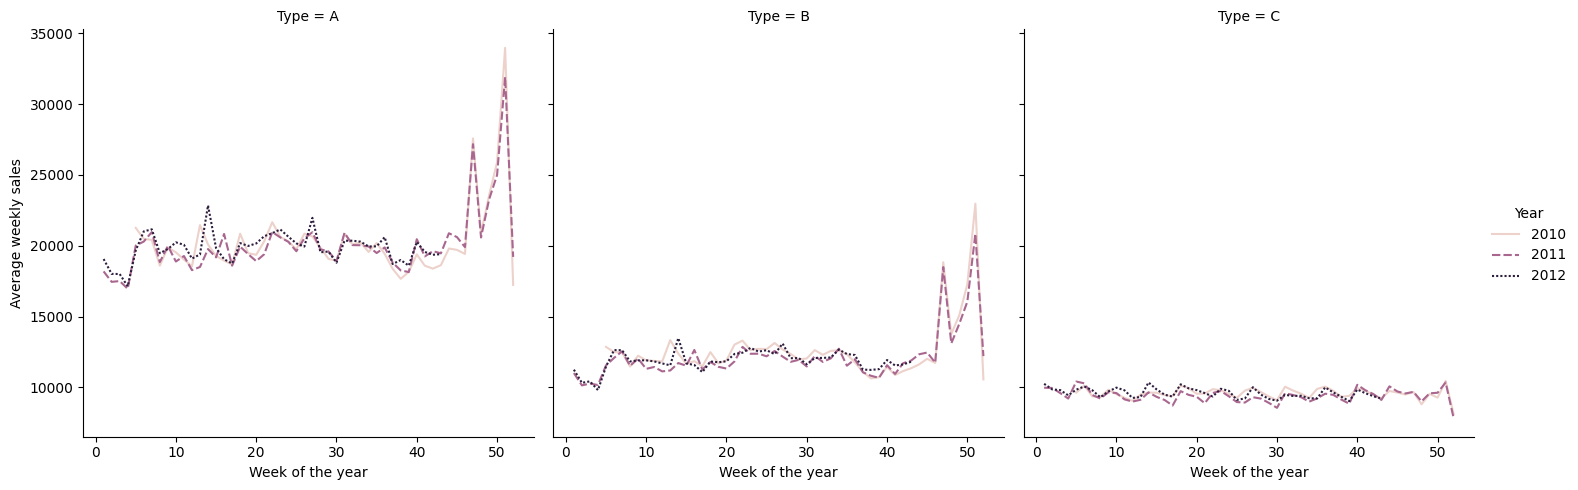

In [65]:
# Let's take a look at average sales per type of store...
salesbytype_dataset = data.groupby(['Date', 'Type']).mean().reset_index()
salesbytype_dataset.index = pd.to_datetime(salesbytype_dataset['Date'])
salesbytype_dataset['Date_'] = pd.to_datetime(salesbytype_dataset.index)
salesbytype_dataset['Year'] = salesbytype_dataset['Date_'].dt.year
salesbytype_dataset['Month'] = salesbytype_dataset['Date_'].dt.month
salesbytype_dataset['Week'] = salesbytype_dataset['Date_'].dt.isocalendar().week
salesbytype_dataset.head()
sns.relplot(
    data=salesbytype_dataset, x="Week", y="Weekly_Sales",
    col="Type", hue="Year", style="Year",
    kind="line").set(xlabel='Week of the year', ylabel='Average weekly sales')

We can see a few patterns:

Stores of types A and B increase dramatically their sales during the holiday period.

Stores of types A and B see lower sales in the first weeks of the year.

The sales in stores of type C remain relatively constant during the year.

All stores seem to exhibit a small spike in sales in the first week of each month, coinciding with paychecks. (This observation suggests that consumer spending behavior is influenced by payday cycles. People tend to spend more in the first week of the month when they receive their salaries.)

There seems to be no significant year-over-year growth in sales over the 2010-2012.

Let's now take a look at the effects of average temperature and fuel prices in sales.

There are two plausible stories:
1. People avoid leaving their houses during extreme weather, so sales could be lower.
2. Given that Walmart sells fuel at a discount (https://www.walmart.com/plus/fuel-discounts), one can expect higher sales when surrounding gas stations have a higher price.

Both of those effects are seen in the data.

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


[(15.0, 95.0)]

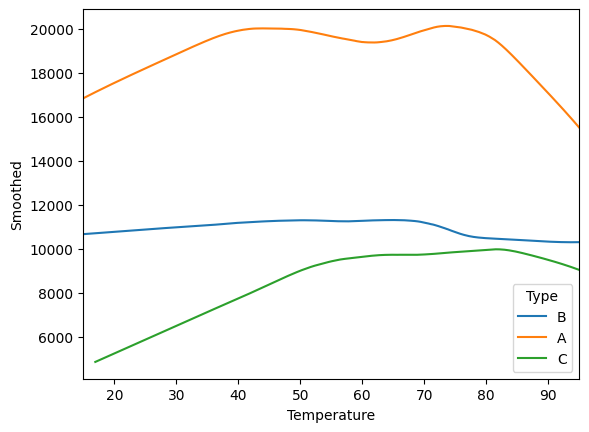

In [67]:
# scatter plot of temperature and sales
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
salesbytemp_dataset = data.groupby(['Temperature','Type']).mean().reset_index()

# Smoothing (https://www.statsmodels.org/dev/examples/notebooks/generated/lowess.html)
# type A
salesbytemp_datasetA = salesbytemp_dataset[salesbytemp_dataset['Type'] == 'A'][['Temperature','Weekly_Sales']]
smoothed = sm.nonparametric.lowess(exog=salesbytemp_datasetA['Temperature'], endog=salesbytemp_datasetA['Weekly_Sales'], frac=0.5)
salesbytemp_datasetA['Smoothed'] = smoothed[:, 1]
salesbytemp_dataset = pd.merge(salesbytemp_dataset,salesbytemp_datasetA,how='left')

# type B
salesbytemp_datasetB = salesbytemp_dataset[salesbytemp_dataset['Type'] == 'B'][['Temperature','Weekly_Sales']]
smoothed = sm.nonparametric.lowess(exog=salesbytemp_datasetB['Temperature'], endog=salesbytemp_datasetB['Weekly_Sales'], frac=0.5)
salesbytemp_datasetB['Smoothed'] = smoothed[:, 1]
salesbytemp_datasetB.head()
salesbytemp_dataset['Smoothed'][salesbytemp_datasetB.index] = salesbytemp_datasetB['Smoothed']

# type C
salesbytemp_datasetC = salesbytemp_dataset[salesbytemp_dataset['Type'] == 'C'][['Temperature','Weekly_Sales']]
smoothed = sm.nonparametric.lowess(exog=salesbytemp_datasetC['Temperature'], endog=salesbytemp_datasetC['Weekly_Sales'], frac=0.5)
salesbytemp_datasetC['Smoothed'] = smoothed[:, 1]
salesbytemp_datasetC.head()
salesbytemp_dataset['Smoothed'][salesbytemp_datasetC.index] = salesbytemp_datasetC['Smoothed']

sns.lineplot(data = salesbytemp_dataset, x='Temperature', y='Smoothed', hue='Type').set(xlim=(15,95))

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

eyeball analysis:
1. sales FALL in more extreme weather in type A
2. type B is relatively constant
3. stores of type C are located in warmer regions

<Axes: xlabel='Fuel_Price', ylabel='Smoothed'>

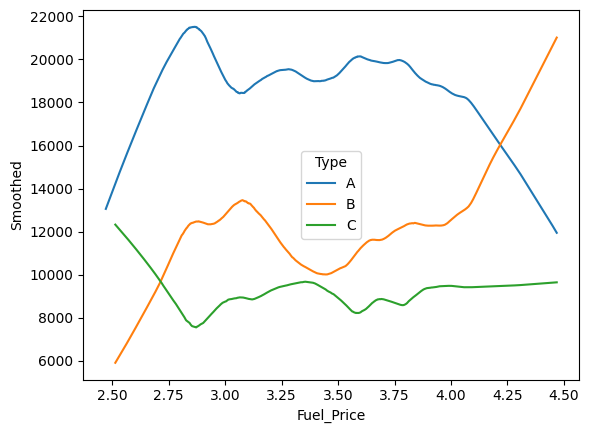

In [69]:
# Same thing for fuel prices
# scatter plot of temperature and sales
salesbyfuel_dataset = data.groupby(['Fuel_Price','Type']).mean().reset_index()

# Smoothing (https://www.statsmodels.org/dev/examples/notebooks/generated/lowess.html)
# type A
salesbyfuel_datasetA = salesbyfuel_dataset[salesbyfuel_dataset['Type'] == 'A'][['Fuel_Price','Weekly_Sales']]
smoothed = sm.nonparametric.lowess(exog=salesbyfuel_datasetA['Fuel_Price'], endog=salesbyfuel_datasetA['Weekly_Sales'], frac=0.2)
salesbyfuel_datasetA['Smoothed'] = smoothed[:, 1]
salesbyfuel_dataset = pd.merge(salesbyfuel_dataset,salesbyfuel_datasetA,how='left')

# type B
salesbyfuel_datasetB = salesbyfuel_dataset[salesbyfuel_dataset['Type'] == 'B'][['Fuel_Price','Weekly_Sales']]
smoothed = sm.nonparametric.lowess(exog=salesbyfuel_datasetB['Fuel_Price'], endog=salesbyfuel_datasetB['Weekly_Sales'], frac=0.2)
salesbyfuel_datasetB['Smoothed'] = smoothed[:, 1]
salesbyfuel_datasetB.head()
salesbyfuel_dataset['Smoothed'][salesbyfuel_datasetB.index] = salesbyfuel_datasetB['Smoothed']

# type C
salesbyfuel_datasetC = salesbyfuel_dataset[salesbyfuel_dataset['Type'] == 'C'][['Fuel_Price','Weekly_Sales']]
smoothed = sm.nonparametric.lowess(exog=salesbyfuel_datasetC['Fuel_Price'], endog=salesbyfuel_datasetC['Weekly_Sales'], frac=0.2)
salesbyfuel_datasetC['Smoothed'] = smoothed[:, 1]
salesbyfuel_datasetC.head()
salesbyfuel_dataset['Smoothed'][salesbyfuel_datasetC.index] = salesbyfuel_datasetC['Smoothed']

sns.lineplot(data = salesbyfuel_dataset, x='Fuel_Price', y='Smoothed', hue='Type')#.set(xlim=(15,95))

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

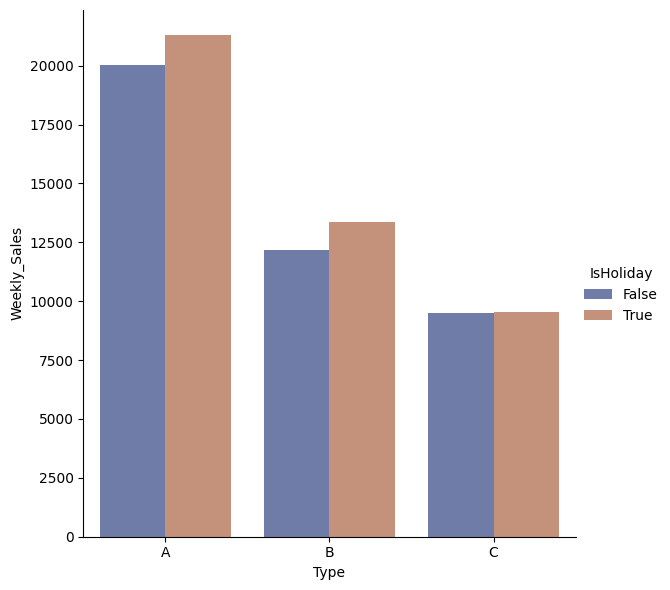

In [71]:
dataBars = data.groupby(['Type', 'IsHoliday']).mean().reset_index()
dataBars.head()

g = sns.catplot(
    data=dataBars, kind="bar",
    x="Type", y="Weekly_Sales", hue="IsHoliday", palette="dark", alpha=.6, height=6
)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

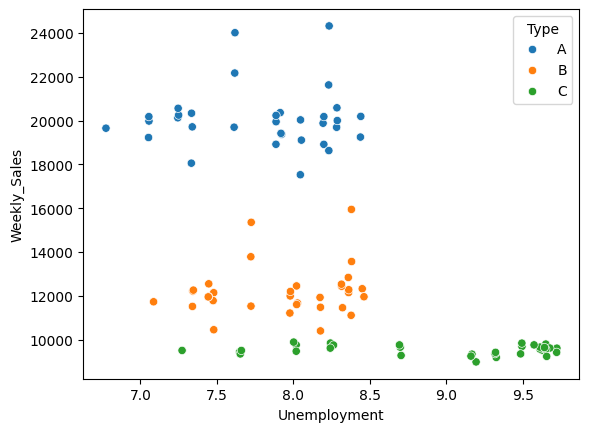

In [73]:
# aggregate sales monthly:
# check how they change with unemployment

dataMonthly = data

dataMonthly['Date'] = pd.to_datetime(dataMonthly['Date'])
dataMonthly['year'] = dataMonthly['Date'].dt.year
dataMonthly['month'] = dataMonthly['Date'].dt.month
dataMonthly['Week'] = dataMonthly['Date'].dt.isocalendar().week
dataMonthly['day'] = 1

dataMonthly = dataMonthly.groupby(['Type','month','year']).mean().reset_index()


dataMonthly['Date_'] = pd.to_datetime(dataMonthly[['month','year','day']])
dataMonthly.index = dataMonthly['Date_']
dataMonthly = dataMonthly.rename(columns={'Date_':'Date'})

sns.scatterplot(data=dataMonthly,x='Unemployment',y='Weekly_Sales',hue='Type')

# Bottom Up Approach


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [76]:
data = data.loc[data['Weekly_Sales'] > 0]

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Type          420212 non-null  object        
 6   Size          420212 non-null  int64         
 7   Temperature   420212 non-null  float64       
 8   Fuel_Price    420212 non-null  float64       
 9   MarkDown1     150181 non-null  float64       
 10  MarkDown2     110904 non-null  float64       
 11  MarkDown3     136651 non-null  float64       
 12  MarkDown4     134518 non-null  float64       
 13  MarkDown5     150929 non-null  float64       
 14  CPI           420212 non-null  float64       
 15  Unemployment  420212 n

<Axes: xlabel='Dept', ylabel='Dept'>

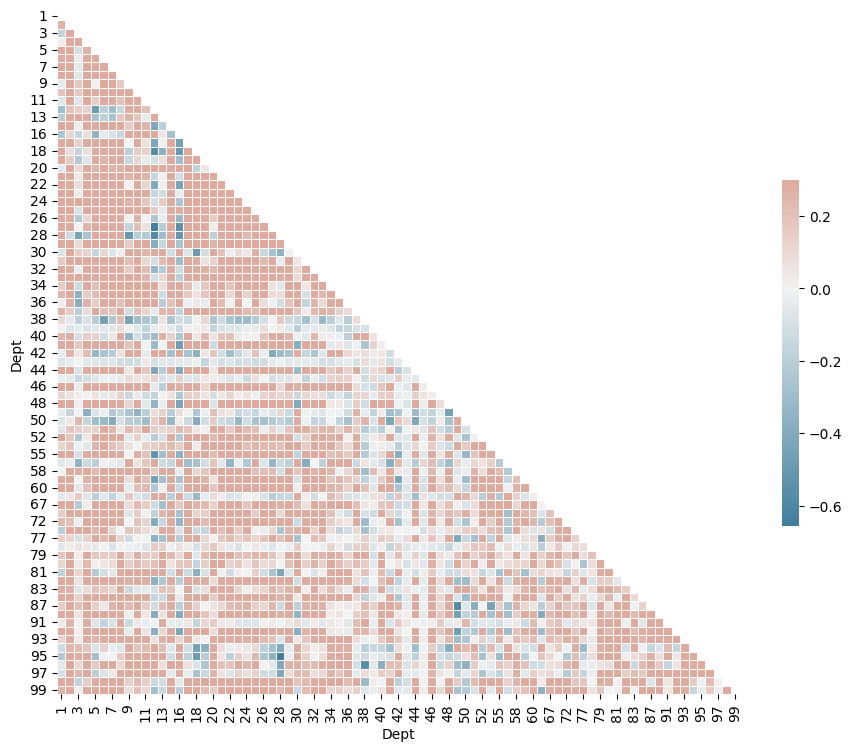

In [78]:
#dataDept = data.groupby(['Dept', 'Date']).mean().reset_index()
dataDept = data.groupby(['Dept', 'Date'])[['Weekly_Sales']].mean().reset_index()
dataDept2 = pd.pivot_table(dataDept,index='Date',columns='Dept', values='Weekly_Sales')
#dataDept2.head()
dataDept2 = dataDept2.fillna(0)
#dataDept2.head()
corrMatrix = dataDept2.corr()

# source code here: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrMatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#https://stackoverflow.com/questions/52787431/create-clusters-using-correlation-matrix-in-python

# Create clusters based on correlations
import scipy.cluster.hierarchy as sch
X = dataDept2.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance') # clusters

clusterDF = pd.DataFrame(data={'Cluster':ind},index=dataDept2.columns)

clusteredData = pd.merge(data,clusterDF,how='left',on='Dept')



In [79]:
clusteredData.head()

,Store,Cluster,Date,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,Week,day,Weekly_Sales_diff
0,1,1,2010-02-05,51.666667,256378.02,0.0,151315.0,42.31,2.572,NaN,...,NaN,NaN,NaN,211.096358,8.106,2010.0,2.0,5.0,1.0,NaN
1,1,1,2010-02-12,52.600000,238075.12,1.0,151315.0,38.51,2.548,NaN,...,NaN,NaN,NaN,211.242170,8.106,2010.0,2.0,6.0,1.0,-18302.90
2,1,1,2010-02-19,52.600000,247012.67,0.0,151315.0,39.93,2.514,NaN,...,NaN,NaN,NaN,211.289143,8.106,2010.0,2.0,7.0,1.0,8937.55
3,1,1,2010-02-26,52.600000,230709.59,0.0,151315.0,46.63,2.561,NaN,...,NaN,NaN,NaN,211.319643,8.106,2010.0,2.0,8.0,1.0,-16303.08
4,1,1,2010-03-05,56.833333,254571.03,0.0,151315.0,46.50,2.625,NaN,...,NaN,NaN,NaN,211.350143,8.106,2010.0,3.0,9.0,1.0,23861.44


In [80]:
clusteredData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45045 entries, 0 to 45044
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Store              45045 non-null  int64         
 1   Cluster            45045 non-null  int32         
 2   Date               45045 non-null  datetime64[ns]
 3   Dept               45045 non-null  float64       
 4   Weekly_Sales       45045 non-null  float64       
 5   IsHoliday          45045 non-null  float64       
 6   Size               45045 non-null  float64       
 7   Temperature        45045 non-null  float64       
 8   Fuel_Price         45045 non-null  float64       
 9   MarkDown1          15960 non-null  float64       
 10  MarkDown2          11459 non-null  float64       
 11  MarkDown3          14322 non-null  float64       
 12  MarkDown4          13755 non-null  float64       
 13  MarkDown5          16065 non-null  float64       
 14  CPI   

In [81]:
clusteredData1 = clusteredData.groupby(['Store','Cluster','Date']).sum().reset_index()
clusteredData1.head()


,Store,Cluster,Date,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,Week,day,Weekly_Sales_diff
0,1,1,2010-02-05,51.666667,256378.02,0.0,151315.0,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,2010.0,2.0,5.0,1.0,0.00
1,1,1,2010-02-12,52.600000,238075.12,1.0,151315.0,38.51,2.548,0.0,...,0.0,0.0,0.0,211.242170,8.106,2010.0,2.0,6.0,1.0,-18302.90
2,1,1,2010-02-19,52.600000,247012.67,0.0,151315.0,39.93,2.514,0.0,...,0.0,0.0,0.0,211.289143,8.106,2010.0,2.0,7.0,1.0,8937.55
3,1,1,2010-02-26,52.600000,230709.59,0.0,151315.0,46.63,2.561,0.0,...,0.0,0.0,0.0,211.319643,8.106,2010.0,2.0,8.0,1.0,-16303.08
4,1,1,2010-03-05,56.833333,254571.03,0.0,151315.0,46.50,2.625,0.0,...,0.0,0.0,0.0,211.350143,8.106,2010.0,3.0,9.0,1.0,23861.44


In [82]:
clusteredData2 = clusteredData.groupby(['Store','Cluster','Date'])[['Dept', 'Weekly_Sales', 'IsHoliday', 'Size',
               'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
               'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'year', 'month',
               'Week', 'day']].mean().reset_index()
clusteredData = clusteredData2
clusteredData['Weekly_Sales'] = clusteredData1['Weekly_Sales']
clusteredData.head(10)

,Store,Cluster,Date,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,Week,day
0,1,1,2010-02-05,51.666667,256378.02,0.0,151315.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010.0,2.0,5.0,1.0
1,1,1,2010-02-12,52.600000,238075.12,1.0,151315.0,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010.0,2.0,6.0,1.0
2,1,1,2010-02-19,52.600000,247012.67,0.0,151315.0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010.0,2.0,7.0,1.0
3,1,1,2010-02-26,52.600000,230709.59,0.0,151315.0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010.0,2.0,8.0,1.0
4,1,1,2010-03-05,56.833333,254571.03,0.0,151315.0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010.0,3.0,9.0,1.0
5,1,1,2010-03-12,52.600000,234940.86,0.0,151315.0,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,2010.0,3.0,10.0,1.0
6,1,1,2010-03-19,52.600000,203010.44,0.0,151315.0,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,2010.0,3.0,11.0,1.0
7,1,1,2010-03-26,52.600000,220627.78,0.0,151315.0,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,2010.0,3.0,12.0,1.0
8,1,1,2010-04-02,52.600000,234459.10,0.0,151315.0,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,2010.0,4.0,13.0,1.0
9,1,1,2010-04-09,51.666667,227325.42,0.0,151315.0,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,2010.0,4.0,14.0,1.0


In [83]:
clusteredData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45045 entries, 0 to 45044
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         45045 non-null  int64         
 1   Cluster       45045 non-null  int32         
 2   Date          45045 non-null  datetime64[ns]
 3   Dept          45045 non-null  float64       
 4   Weekly_Sales  45045 non-null  float64       
 5   IsHoliday     45045 non-null  float64       
 6   Size          45045 non-null  float64       
 7   Temperature   45045 non-null  float64       
 8   Fuel_Price    45045 non-null  float64       
 9   MarkDown1     15960 non-null  float64       
 10  MarkDown2     11459 non-null  float64       
 11  MarkDown3     14322 non-null  float64       
 12  MarkDown4     13755 non-null  float64       
 13  MarkDown5     16065 non-null  float64       
 14  CPI           45045 non-null  float64       
 15  Unemployment  45045 non-null  float6

In [90]:
# There are 45 stores and 7 clusters in total, 45*7 = 35+280=315 iterations...
# Let's do some exploration first. Below, we can plot cluster by cluster, store by store
import statsmodels.tsa.forecasting.stl as STLForecastResults
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.arima.model import ARIMA
# Importing STL from statsmodels
from statsmodels.tsa.seasonal import STL
# Importing XGBoost
import xgboost as xgb

def forecaster(clusteredData, storeInd, clusterInd):
    m1 = clusteredData['Store'] == storeInd
    m2 = clusteredData['Cluster'] == clusterInd
    filtered = clusteredData[m1 & m2]

    stl = STL(filtered['Weekly_Sales'], period=52, seasonal=53, robust=True)
    res = stl.fit()
    seasonalPart1 = res.seasonal
    trendPart = res.trend
    residualPart = res.resid

    filtered['Trend'] = trendPart
    filtered['SeasonalOne'] = seasonalPart1
    filtered['Residuals'] = residualPart
    filtered.index = filtered['Date']
    filtered = filtered.drop(columns=['Date', 'Dept', 'Store', 'Cluster', 'Size'])
    filtered = filtered.fillna(0)

    features = ['IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
                'MarkDown5', 'Unemployment', 'month', 'Week']

    # Forecast seasonal component
    X_train = filtered[features][1:113]
    X_train = pd.get_dummies(X_train, columns=['month', 'Week'])
    y_train = filtered['SeasonalOne'][1:113]

    X_test = filtered[features][113:143]
    X_test = pd.get_dummies(X_test, columns=['month', 'Week'])
    y_test = filtered['SeasonalOne'][113:143]

    col_list = list(set().union(X_train.columns, X_test.columns))
    col_list.sort()
    X_train = X_train.reindex(columns=col_list, fill_value=0)
    X_test = X_test.reindex(columns=col_list, fill_value=0)

    reg = xgb.XGBRegressor(base_score=0.1, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=30,
                           objective='reg:squarederror',
                           max_depth=3,
                           learning_rate=0.1)

    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=0)

    resultsForecSeason = pd.DataFrame({'Actual': y_test, 'Forecasted': reg.predict(X_test), 'Store': storeInd, 'Cluster': clusterInd})
    resultsForecSeason = resultsForecSeason.reset_index()
    resultsForecSeason.index = resultsForecSeason['Date']

    # Forecast residual component
    X_train = filtered[features][1:113]
    X_train = pd.get_dummies(X_train, columns=['month', 'Week'])
    y_train = filtered['Residuals'][1:113]

    X_test = filtered[features][113:143]
    X_test = pd.get_dummies(X_test, columns=['month', 'Week'])
    y_test = filtered['Residuals'][113:143]

    col_list = list(set().union(X_train.columns, X_test.columns))
    col_list.sort()
    X_train = X_train.reindex(columns=col_list, fill_value=0)
    X_test = X_test.reindex(columns=col_list, fill_value=0)

    reg = xgb.XGBRegressor(base_score=0.1, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=30,
                           objective='reg:squarederror',
                           max_depth=3,
                           learning_rate=0.1)

    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=0)

    resultsForecResid = pd.DataFrame({'Actual': y_test, 'Forecasted': reg.predict(X_test), 'Store': storeInd, 'Cluster': clusterInd})
    resultsForecResid = resultsForecResid.reset_index()
    resultsForecResid.index = resultsForecResid['Date']

    # Forecast trend component
    stlf = STLForecast(filtered['Weekly_Sales'][1:113], ARIMA, model_kwargs={"order": (2, 1, 0)})
    res = stlf.fit()
    resultsForecTrend = res.forecast(30)

    resultsForec = pd.DataFrame({'predicted_mean': resultsForecTrend})
    resultsForec.index = resultsForecResid['Date']
    resultsForec['Date'] = resultsForecResid['Date']

    resultsForec['predicted_season'] = resultsForecSeason['Forecasted']
    resultsForec['predicted_resid'] = resultsForecResid['Forecasted']
    resultsForec['Forecast'] = resultsForec['predicted_mean'] + resultsForec['predicted_season'] + resultsForec['predicted_resid']
    FinalForec = pd.DataFrame({'Actual': filtered['Weekly_Sales'][113:143], 'Forecasted': resultsForec['Forecast'], 'Store': storeInd, 'Cluster': clusterInd})
    return FinalForec


In [96]:
FinalForec = pd.DataFrame()

gridStores = np.linspace(1,45,45)
gridCluster = np.linspace(1,7,7)

for sC in gridStores:
    for gC in gridCluster:
        aux = forecaster(clusteredData,sC,gC)
        FinalForec = pd.concat([FinalForec, aux])

<Axes: title={'center': 'The bottom-up forecast'}, xlabel='Date'>

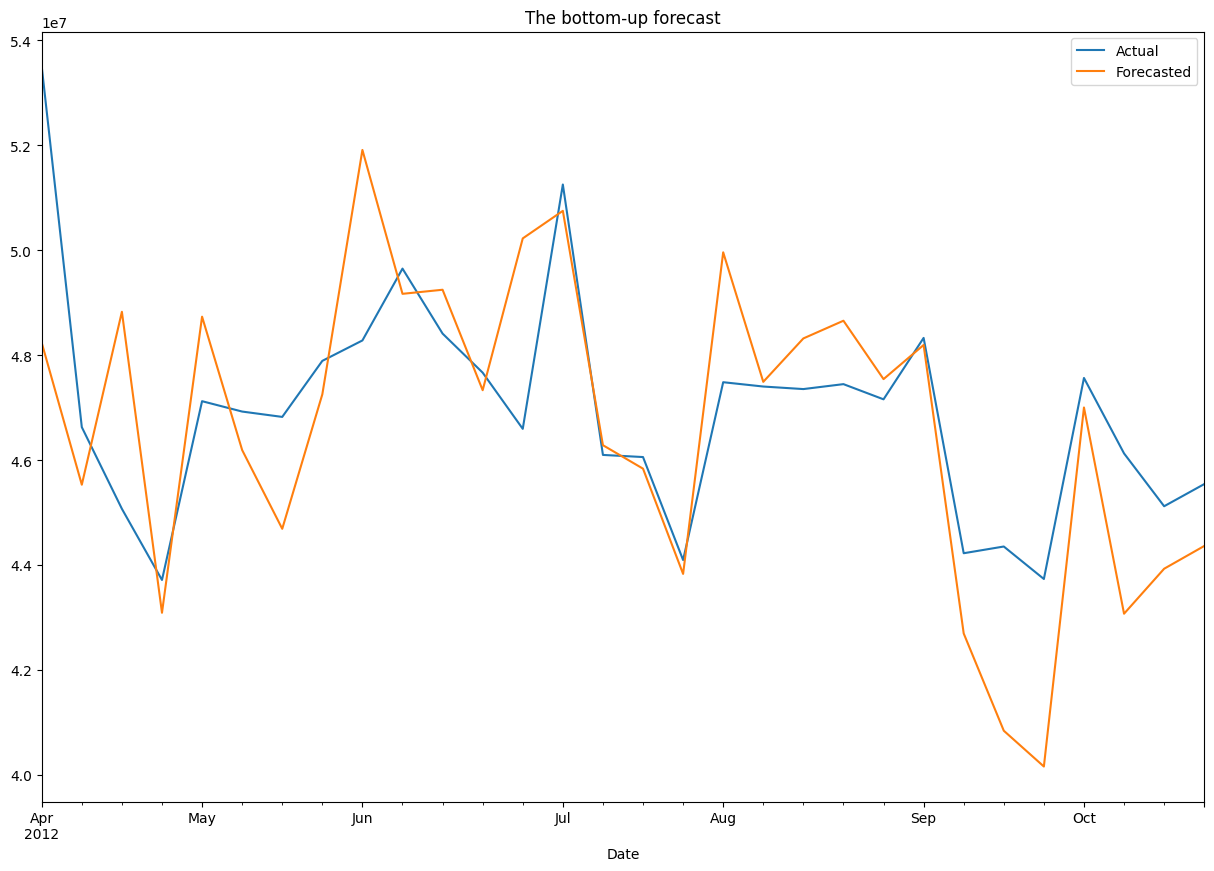

In [97]:
# Bottom-up forecast
FinalForec2 = FinalForec.groupby('Date').sum()
FinalForec2 = FinalForec2.drop(columns=['Store','Cluster'])

FinalForec2.plot(figsize=(15, 10), title='The bottom-up forecast')

In [98]:
FinalForec2['Bottom-up forecasts'] = FinalForec2['Forecasted']
MSE_BU = np.mean((FinalForec2['Bottom-up forecasts']-FinalForec2['Actual'])**2)
MSE_BU

4262956029014.3037

In [99]:
FinalForec2

,Actual,Forecasted,Bottom-up forecasts
Date,,,
2012-04-06,53502476.06,4.823792e+07,4.823792e+07
2012-04-13,46629682.72,4.553264e+07,4.553264e+07
2012-04-20,45073217.62,4.882834e+07,4.882834e+07
2012-04-27,43717315.31,4.309208e+07,4.309208e+07
2012-05-04,47124459.51,4.873509e+07,4.873509e+07
2012-05-11,46926829.21,4.619331e+07,4.619331e+07
2012-05-18,46824854.84,4.469237e+07,4.469237e+07
2012-05-25,47892949.14,4.725526e+07,4.725526e+07
2012-06-01,48281966.93,5.191280e+07,5.191280e+07
